<H2>1. 必要なライブラリを読み込む</H2>

In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')

from __future__ import print_function

<H2>2. データの読み込み</H2>
<p> pandasにはread_csvという関数が用意されており、それを用いれば簡単にCSVファイルを読み込むことができます</p>
<p>データはdatasetフォルダ直下にある"kc_house_data.csv"を使用します。</p>

In [2]:
dataset = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print('Number of Rows: %i   Number of Columns: %i' % dataset.shape)

Number of Rows: 21613   Number of Columns: 21


<h2>3. 要約統計量を出力する</h2>
<p> describeでデータ数、平均や中央値、標準偏差などの統計量が出力される</p>

In [5]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<H2>4. 最も基本的なデータの操作</H2>

<h3> インデックスを用いた行の指定</h3>
<p>インデックス番号0~10の行を抽出する</p>

In [6]:
dataset.ix[0:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<h3> カラム名を用いた列の指定</h3>
<p> 最初の10行の"price"と"bedrooms"の列を抽出する</p>

In [7]:
dataset.ix[:9][['price', 'bedrooms']]
# dataset.priceでも良い

,price,bedrooms
0,221900.0,3
1,538000.0,3
2,180000.0,2
3,604000.0,4
4,510000.0,3
5,1225000.0,4
6,257500.0,3
7,291850.0,3
8,229500.0,3
9,323000.0,3


<h3>カラム間の演算</h3>
<p>ここでは例として"sqft_above"と"sqft_basement"を合計した"sqft_total"を新たな列として加える</p>

In [8]:
dataset['sqft_total'] = dataset['sqft_above'] + dataset['sqft_basement']
dataset.ix[0:9][['id', 'sqft_above', 'sqft_basement', 'sqft_total']]

,id,sqft_above,sqft_basement,sqft_total
0,7129300520,1180,0,1180
1,6414100192,2170,400,2570
2,5631500400,770,0,770
3,2487200875,1050,910,1960
4,1954400510,1680,0,1680
5,7237550310,3890,1530,5420
6,1321400060,1715,0,1715
7,2008000270,1060,0,1060
8,2414600126,1050,730,1780
9,3793500160,1890,0,1890


<h3>カラムに関数を適用する</h3>
<p>"date"は文字列になっているが、これを年と月で分解して新しいカラムとして追加する</p>

In [9]:
def date_str2year(x):
    # 最初の４文字を取り出せば、年になる
    return int(x[:4])

def date_str2month(x):
    # 5文字から6文字目を取り出せば、月になる
    return int(x[4:6])

In [10]:
dataset['date_year'] = dataset.date.apply(date_str2year)
dataset['date_month'] = dataset.date.apply(date_str2month)
dataset.ix[0:9][['id','date', 'date_year', 'date_month']]

,id,date,date_year,date_month
0,7129300520,20141013T000000,2014,10
1,6414100192,20141209T000000,2014,12
2,5631500400,20150225T000000,2015,2
3,2487200875,20141209T000000,2014,12
4,1954400510,20150218T000000,2015,2
5,7237550310,20140512T000000,2014,5
6,1321400060,20140627T000000,2014,6
7,2008000270,20150115T000000,2015,1
8,2414600126,20150415T000000,2015,4
9,3793500160,20150312T000000,2015,3


<h3>ダミー変数を作る</h3>
<p> 一般的にはカテゴリ変数を機械学習のモデルに投入する際、0と1のダミー変数に変換する。</p>

In [11]:
dataset = pd.get_dummies(data=dataset, columns=['view'])

<p>上記を実行すると、"view"という変数の代わりに、"view_1", "view_2"..."vier4"というダミー変数に展開される。</p>

In [12]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_total', 'date_year', 'date_month',
       'view_0', 'view_1', 'view_2', 'view_3', 'view_4'],
      dtype='object')

In [13]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,...,1340,5650,1180,2014,10,1.0,0.0,0.0,0.0,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,...,1690,7639,2570,2014,12,1.0,0.0,0.0,0.0,0.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,...,2720,8062,770,2015,2,1.0,0.0,0.0,0.0,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,...,1360,5000,1960,2014,12,1.0,0.0,0.0,0.0,0.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,...,1800,7503,1680,2015,2,1.0,0.0,0.0,0.0,0.0


<h3>条件でのフィルタリング</h3>
<p>bedroomsが1以下の物件のみを抽出する</p>

<p>(参考)pandasのデータフレームへのカラムへのアクセスですが、これまでdataset["カラム名"]という書き方をしていましたが、別の方法としてdataset.カラム名というアクセスの仕方があります。</p>

In [14]:
dataset[dataset['bedrooms'] < 1]
# 以下と同じ
# dataset[dataset.bedrooms < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0.0,0.0,1.0,0.0,0.0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0.0,0.0,1.0,0.0,0.0
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,3,...,1430,1650,1430,2014,8,1.0,0.0,0.0,0.0,0.0
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,2,...,2170,6000,390,2014,10,1.0,0.0,0.0,0.0,0.0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1.0,0.0,0.0,0.0,0.0
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,3,...,2500,8751,2290,2014,11,1.0,0.0,0.0,0.0,0.0
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,3,...,1810,5685,1810,2014,9,1.0,0.0,0.0,0.0,0.0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1.0,0.0,0.0,0.0,0.0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1.0,0.0,0.0,0.0,0.0
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,3,...,1500,4675,1490,2015,2,1.0,0.0,0.0,0.0,0.0


<h3>複数条件でのデータ抽出</h3>
<p>ここではbedroomsもbathroomsも1以下の物件を抽出</p>

<p>numpyの関数logical_andを使って指定するやり方</p>

In [15]:
dataset[np.logical_and((dataset['bedrooms'] < 1), (dataset['bathrooms'] < 1))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0.0,0.0,1.0,0.0,0.0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0.0,0.0,1.0,0.0,0.0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1.0,0.0,0.0,0.0,0.0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1.0,0.0,0.0,0.0,0.0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1.0,0.0,0.0,0.0,0.0
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,4,...,1380,9600,844,2015,4,1.0,0.0,0.0,0.0,0.0
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,3,...,1920,224341,384,2014,10,1.0,0.0,0.0,0.0,0.0
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,1,...,1620,22850,290,2014,9,1.0,0.0,0.0,0.0,0.0


<p>numpyのallを使って指定するやり方</p>

In [16]:
a = np.array(dataset['bedrooms'] < 1)
b = np.array(dataset['bathrooms'] < 1)

In [17]:
dataset[np.all([a, b], axis=0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0.0,0.0,1.0,0.0,0.0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0.0,0.0,1.0,0.0,0.0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1.0,0.0,0.0,0.0,0.0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1.0,0.0,0.0,0.0,0.0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1.0,0.0,0.0,0.0,0.0
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,4,...,1380,9600,844,2015,4,1.0,0.0,0.0,0.0,0.0
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,3,...,1920,224341,384,2014,10,1.0,0.0,0.0,0.0,0.0
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,1,...,1620,22850,290,2014,9,1.0,0.0,0.0,0.0,0.0


<p>ビット演算子の"&"を使って指定するやり方。ただし、ビット演算子なので、"(dataset["bedrooms"] <1)" は必ずTrue/Falseになるので問題ないが、それ以外の値が来た場合、予期せぬ動きをする可能性があるので注意が必要</p>

In [18]:
dataset[(dataset['bedrooms'] < 1) & (dataset['bathrooms'] < 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0.0,0.0,1.0,0.0,0.0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0.0,0.0,1.0,0.0,0.0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1.0,0.0,0.0,0.0,0.0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1.0,0.0,0.0,0.0,0.0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1.0,0.0,0.0,0.0,0.0
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,4,...,1380,9600,844,2015,4,1.0,0.0,0.0,0.0,0.0
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,3,...,1920,224341,384,2014,10,1.0,0.0,0.0,0.0,0.0
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,1,...,1620,22850,290,2014,9,1.0,0.0,0.0,0.0,0.0


<h2>5. 分布の確認(データ可視化入門）</h2>

<h3>ヒストグラム</h3>
<p>ひとつの数値データのバラツキを可視化する際にはヒストグラムが有効</p>

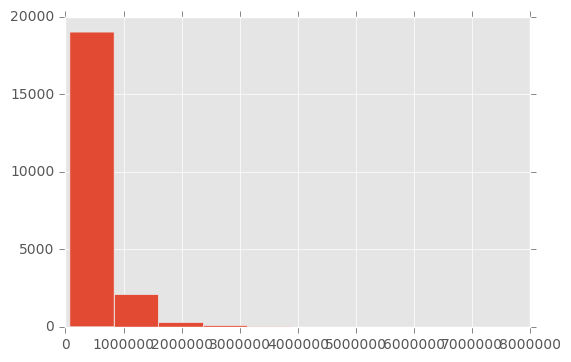

In [19]:
dataset['price'].hist()
# 以下でも同じ
# dataset.price.hist()

<p>logスケールにしたい場合は、Numpyのlog関数を使って行う</p>

(array([  6.30000000e+01,   5.33000000e+02,   3.97700000e+03,
          7.18300000e+03,   6.34500000e+03,   2.54100000e+03,
          7.33000000e+02,   1.93000000e+02,   3.80000000e+01,
          7.00000000e+00]),
 array([ 11.22524339,  11.68839214,  12.15154089,  12.61468964,
         13.07783839,  13.54098714,  14.00413589,  14.46728464,
         14.93043339,  15.39358214,  15.85673089]),
 <a list of 10 Patch objects>)

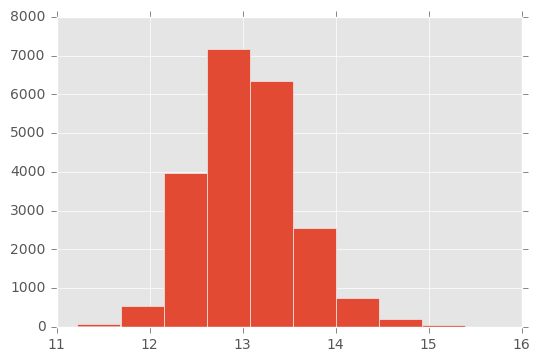

In [20]:
plt.hist(np.log(dataset['price']))

<h3>散布図</h3>
<p>2つの変数のバラツキや相関関係を確認するには散布図を使う</p>

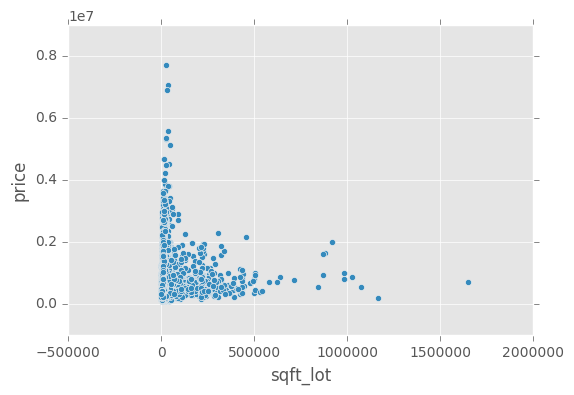

In [21]:
dataset.plot(kind='scatter', x='sqft_lot', y='price')

<h3>Group Byで集計して棒グラフ</h3>
<p> "condition"はカテゴリ変数なので、この変数をキーにして"price"の平均を集計し、それを棒グラフにします</p>

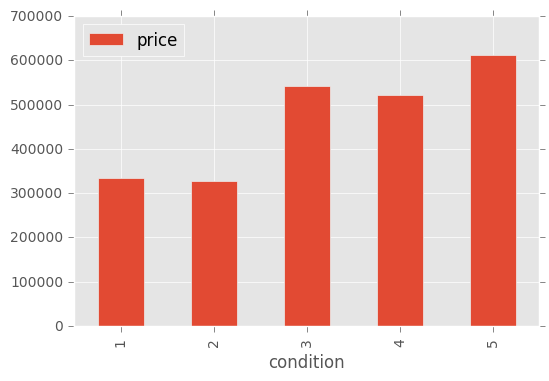

In [22]:
price_by_condition = \
 dataset.groupby('condition').aggregate({'price': np.mean}).reset_index()
price_by_condition.plot.bar(x='condition')

<h3>箱ヒゲ図(Boxplot) </h3>
<p>棒グラフにすると平均の比較はできますが、分布全体の比較はできません。そこで箱ヒゲ図の出番です。</p>
<p>各要因ごとに分布を比較したいときに箱ヒゲ図はとても便利です</p>

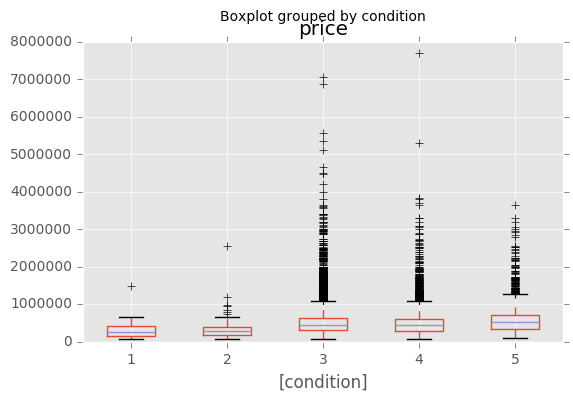

In [23]:
dataset[['condition', 'price']].boxplot(by='condition')

<h2>6. 欠損の確認とその対応</h2>
<p> 欠損値がある場合、本来はその発生原因を理解する必要があります。なぜなら、その原因によって対応方針は異なるためです。</p>
<p>ここでは、欠損があるカラムをチェックします</p>
<br>
<p>まずあまり効率的ではないものの、pandasに慣れるため各列ごとにチェックしていきます</p>

In [24]:
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, '; # of missing record: ', missing_num)

id ; # of missing record:  0
date ; # of missing record:  0
price ; # of missing record:  0
bedrooms ; # of missing record:  0
bathrooms ; # of missing record:  0
sqft_living ; # of missing record:  0
sqft_lot ; # of missing record:  0
floors ; # of missing record:  0
waterfront ; # of missing record:  0
condition ; # of missing record:  0
grade ; # of missing record:  0
sqft_above ; # of missing record:  0
sqft_basement ; # of missing record:  0
yr_built ; # of missing record:  0
yr_renovated ; # of missing record:  0
zipcode ; # of missing record:  0
lat ; # of missing record:  0
long ; # of missing record:  0
sqft_living15 ; # of missing record:  0
sqft_lot15 ; # of missing record:  0
sqft_total ; # of missing record:  0
date_year ; # of missing record:  0
date_month ; # of missing record:  0
view_0 ; # of missing record:  0
view_1 ; # of missing record:  0
view_2 ; # of missing record:  0
view_3 ; # of missing record:  0
view_4 ; # of missing record:  0


<p>applyを使って欠損を確認する方法</p>

In [25]:
missing_check = dataset.copy()
missing_check = missing_check.apply(pd.isnull, axis=1)
missing_check.apply(sum, axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_total       0
date_year        0
date_month       0
view_0           0
view_1           0
view_2           0
view_3           0
view_4           0
dtype: int64

<p>欠損はない。もしあれば、dataset.fillna()を使って補完するか、dataset.dropna()で欠損があるレコードを削除する</p>

<h2>7. 特徴量の作成</h2>
<p> 既存の特徴量を使って（ターゲットの変数である"price"を除いて）新しい特徴量を作りましょう</p>

In [26]:
dataset['sqft_living_div_sqft_living15'] = \
 dataset['sqft_living'] / (dataset['sqft_living15'] + 0.001)

In [27]:
'Enter your code here'

'Enter your code here'

<h2>8. Scikit Learnを用いた予測モデルの構築</h2>

<p>早速、機械学習モデルを使ってみよう</p>
<p>ここでは以下の機械学習アルゴリズムを試します</p>
<li>線形回帰モデル</li>
<li>決定木</li>
<li>ランダムフォレスト</li>
<li>サポートベクトル回帰</li>
<p>また、モデル評価はMSEとします</p>

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

<h3>ターゲット変数と特徴量を指定してsklearnに渡せるように準備する</h3>

In [29]:
target_col = 'price'
exclude_cols = ['price', 'id', 'date']
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [30]:
feature_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_total',
 'date_year',
 'date_month',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'sqft_living_div_sqft_living15']

In [31]:
y = np.array(dataset[target_col])
X = np.array(dataset[feature_cols])

In [32]:
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.3, random_state=1234)
X_train1, X_train2, y_train1, y_train2 = \
 train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

<h2>8-1. アルゴリズムの選択</h2>

<h3>線形回帰モデル</h3>

In [33]:
lm = LinearRegression()
lm.fit(X_train1, y_train1)
y_pred2 = lm.predict(X_train2)
lm_mse = mean_squared_error(y_train2, y_pred2)
print('LinerRegression MSE: ', lm_mse)

LinerRegression MSE:  41274874973.1


<h3>回帰木</h3>

In [34]:
dt = DecisionTreeRegressor()
dt.fit(X_train1, y_train1)
y_pred2 = dt.predict(X_train2)
dt_mse = mean_squared_error(y_train2, y_pred2)
print('DT MSE: ', dt_mse)

DT MSE:  36163982642.6


<h3>ランダムフォレスト</h3>

In [35]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  21761809690.7


In [36]:
algos = ['LinerRegression', 'DecisionTree', 'RandomForest']
mses = [lm_mse,dt_mse, rf_mse]
print('Best Alogorithms : ', algos[np.argmin(mses)] )

Best Alogorithms :  RandomForest


<h2>8-2. 変数選択</h2>
<h3>変数増加法で変数選択をしてみる</h3>

In [ ]:
def get_greedy_foward_select_feature_indices(X, y, features, clf):
    X_train_, X_test_, y_train_, y_test_ = \
        train_test_split(X, y, test_size=0.3, random_state=1234)
    feature_indices = {feature: idx for idx, feature in enumerate(features)}
    features = set(features)
    last_mse = np.inf
    chosen_features = set()
    while len(chosen_features) < len(features):
        mse_features = []
        for feature in (features - chosen_features):
            candidates = chosen_features.union(set([feature]))
            indices = [feature_indices[feature] for feature in candidates]
            clf.fit(X_train_[:, indices], y_train_)
            y_pred = clf.predict(X_test_[:, indices])
            mse = mean_squared_error(y_test_, y_pred)
            mse_features += [(mse, feature)]
        mse, feature = min(mse_features)
        if mse >= last_mse:
            break
        last_mse = mse
        print('Newly Added Feature: {},\tMSE Score: {}'.format(feature, mse))
        chosen_features.add(feature)
    return [feature_indices[feature] for feature in chosen_features]


In [ ]:
selected_feature_index = get_greedy_foward_select_feature_indices(X_train, y_train, feature_cols, RandomForestRegressor(random_state=1234))

Newly Added Feature: grade,	MSE Score: 69167238833.2835
Newly Added Feature: zipcode,	MSE Score: 38579439728.86474
Newly Added Feature: view_4,	MSE Score: 32541956711.136333
Newly Added Feature: sqft_living,	MSE Score: 30681918159.93282
Newly Added Feature: lat,	MSE Score: 24835274161.565964
Newly Added Feature: yr_built,	MSE Score: 22325856254.46972
Newly Added Feature: bedrooms,	MSE Score: 22196063780.883095


<h3>改めて、変数選択後の精度を確認してみましょう</h3>

In [ ]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1[:, selected_feature_index], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest MSE: ', rf_mse)

<h2>8-3. クロスバリデーションによるパラメーターのチューニング</h2>

In [ ]:
rf = RandomForestRegressor(random_state=1234)

In [ ]:
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

In [ ]:
gscv = GridSearchCV(rf, param_grid=params, verbose=1,
                    cv=3, scoring='mean_squared_error')

In [ ]:
gscv.fit(X_train1[:, selected_feature_index], y_train1)

In [ ]:
gscv.best_params_

<h3>パラメーターチューニング後のスコアを見てみましょう</h3>

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train1[:, selected_feature_index ], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest MSE: ', rf_mse)

<h2>8-4. テストデータへ適用して精度を確認する</h2>

<h3>モデルの学習</h3>

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train[:, selected_feature_index], y_train)

In [ ]:
y_pred_on_test = rf.predict(X_test[:, selected_feature_index])
rf_mse = mean_squared_error(y_test, y_pred_on_test)
print('RandomForest MSE: ', rf_mse)

<h2>8-5. 誤差の様子を可視化して確認</h2>

<h3>予測数値と実際の値の散布図</h3>

In [ ]:
plt.scatter(y_test, y_pred_on_test)

<h3>誤差のヒストグラム</h3>

In [ ]:
error_rate = (y_test - y_pred_on_test) / y_test
plt.hist(error_rate)
print('Mean: ', np.mean(error_rate))
print('Std: ', np.std(error_rate))